# Project Notebook

### "Supervised classification based on expected values of density matrices in a quantum computer"

### Qiskit Fall Fest Hackathon

---

**Group: Quantum Mind UN**

Diego Useche - diusecher@unal.edu.co

Oscar Alberto Bustos B. - oabustosb@unal.edu.co

This project aims to construct shallow quanum circuits that can be used to perform the classification of images of handwritten digits. To do this, two approximations are explored: first, designing and running quantum circuits whose final measurements allow to build predictions; and second, the use of density matrices to determine, using Born's rule, the expected value of probability for each possible outcome. Our work is mainly based on *Fabio  A.  González,  Alejandro  Gallego,  Santiago  Toledo-Cortés, and Vladimir Vargas-Calderón. Learning with Density Matrices and Random Features. 2021*.

**Main Contributions**



*   Most quantum machine learning algorithms are based on pure states. Our algorithm is based on mixed states.
*   We propose a quantum protocol to estimate the expected value of a (2^nx2^n) density matrix with a state.
*   We implement the prediction phase of the supervised learning method Density Matrix Kernel Density Classification (DMKDC) [González2021].
*   We apply the method to the classification 
of handwritten digit images (0 and 1).

## Libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 6.1 MB 5.8 MB/s 
     |████████████████████████████████| 17.9 MB 116 kB/s 
     |████████████████████████████████| 236 kB 83.4 MB/s 
     |████████████████████████████████| 207 kB 29.6 MB/s 
     |████████████████████████████████| 2.1 MB 33.4 MB/s 
     |████████████████████████████████| 634 kB 87.8 MB/s 
     |████████████████████████████████| 1.4 MB 52.4 MB/s 
     |████████████████████████████████| 52 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 943 kB 88.5 MB/s 
     |████████████████████████████████| 38.2 MB 20 kB/s 
     |████████████████████████████████| 3.5 MB 41.5 MB/s 
     |████████████████████████████████| 6.3 MB 20.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=a22fcccae17c9f47d1128c1d45444b3d6867cd1e876093fe68e77327ec29bd73
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a29301

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
#from qiskit import *
import numpy as np
backend = Aer.get_backend('qasm_simulator')

## Utils Functions

In [ ]:
# Given the density matrix find the angle of the corresponding rotation
def measure_theta(P):
  w0, v0 = np.linalg.eig(P)
  v0 = v0*np.sign(v0[0, 0])
  theta = np.sign(v0[0, 0])*np.sign(v0[1, 0])*2*np.arccos(abs(v0[0, 0]))
  return theta

# measure_theta(P_1)

In [ ]:
# Given an rotation angle in the y axis, print its unitary matrix
def unitary_matrix(theta):
  qc = QuantumCircuit(1, 1)
  qc.ry(theta, 0)
  unitary_backend = Aer.get_backend('unitary_simulator')
  unitary = execute(qc, unitary_backend).result().get_unitary().round(10)
  return unitary

#unitary_matrix(-1.0013820370897397)
unitary_matrix(1.047184849024927)

array([[ 0.86602858+0.j, -0.4999945 +0.j],
       [ 0.4999945 +0.j,  0.86602858+0.j]])

In [ ]:
import copy
def round_lambda(lambda_param_2):
  lambda_param = copy.copy(lambda_param_2)
  for i in range(4):
    if lambda_param[i] < 0.00000001:
      lambda_param[i] = 0.00000001
  lambda_param[3] = 1 - lambda_param[0] - lambda_param[1] - lambda_param[2]
  return lambda_param

## Initializations

Inicializador de dos qubits

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [ ]:
def ArbRot(p0, p1, p2, p3):
    qr = QuantumRegister(2)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.rx(ang0, qr[1])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.rx(ang1, qr[0])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.crx(ang2, qr[1], qr[0])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbInit"
    return gate

In [ ]:
def ArbRotControlled(p0, p1, p2, p3):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.crx(ang0, qr[0],  qr[2])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.crx(ang1, qr[0], qr[1])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(ang2, [qr[0], qr[2]], qr[1])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbInit"
    return gate

In [ ]:
def ArbRotControlledTranspose(p0, p1, p2, p3):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.crx(-ang0, qr[0],  qr[2])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.crx(-ang1, qr[0], qr[1])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[2]], qr[1])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbInit"
    return gate

In [ ]:
def ArbRotToffTranspose(p0, p1, p2, p3):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.mcrx(-ang0, [qr[0], qr[1]],  qr[3])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.mcrx(-ang1, [qr[0], qr[1]], qr[2])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[1], qr[3]], qr[2])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbInitCT"
    return gate

In [ ]:
def ArbRotToffM2Transpose(p0, p1, p2, p3):
    qr = QuantumRegister(5)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.mcrx(-ang0, [qr[0], qr[1], qr[2]],  qr[4])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.mcrx(-ang1, [qr[0], qr[1], qr[2]], qr[3])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[1], qr[2], qr[4]], qr[3])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbInitCT"
    return gate

## Expected Value Density Matrix 2x2

In [ ]:
a0 = np.array([0.30507657, 0.9523278250881023])
b0 = np.array([0.75399555, 0.6568795251643924])
c0 = np.array([0.50986323, 0.8602554775727772])

In [ ]:
P0 = 0.35*np.outer(a0, a0) + 0.65*np.outer(b0, b0)
exp_c = c0.T @ P0 @ c0

P0, exp_c

(array([[0.40210614, 0.42362127],
        [0.42362127, 0.59789386]]), 0.9186080711795597)

In [ ]:
# Find eigenvectors and eigenvalues
lambda_P, U = np.linalg.eigh(P0)

lambda_P, U

(array([0.06521478, 0.93478522]), array([[-0.78267315,  0.62243292],
        [ 0.62243292,  0.78267315]]))

In [ ]:
vector_0, vector_1 = U[:, 0], U[:, 1]

vector_0, vector_1, 0.5*np.dot(vector_0, a0)**2, 0.5*np.dot(vector_1, b0)**2

(array([-0.78267315,  0.62243292]),
 array([0.62243292, 0.78267315]),
 0.06265267056613329,
 0.4835708408491834)

In [ ]:
0.5 * (np.dot(vector_0, c0)**2/(np.dot(vector_0, c0)**2+np.dot(vector_1, c0)**2))

0.009301806757675855

In [ ]:
theta_0, theta_1 = measure_theta(U), measure_theta(U.T)
theta_0 = theta_0+np.pi
theta_1 = theta_0-np.pi/2
theta_0, theta_1

(2.4697453073741347, 0.8989489805792381)

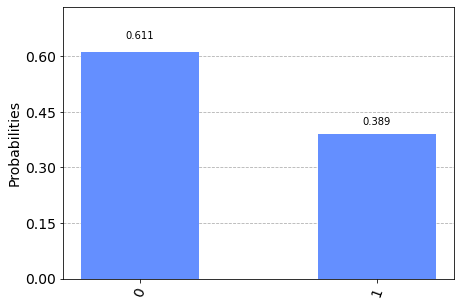

In [ ]:
qc = QuantumCircuit(1, 1)

qc.ry(2*theta_0, 0)


qc.measure(0, 0)

counts = execute(qc, backend, shots=15000).result().get_counts()
plot_histogram(counts)

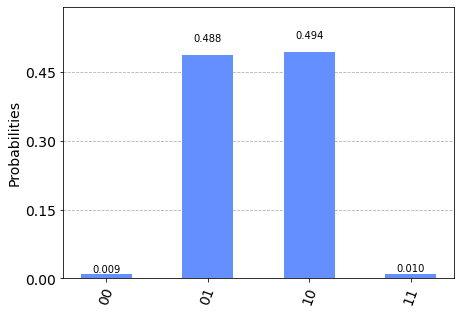

In [ ]:
# 2 x 2 Example

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.x(0)
qc.initialize(c0, 1)
qc.cry(-(2*theta_0), 0,  1)
qc.x(0)
qc.cry(-(2*theta_1), 0,  1)
qc.measure(0, 0)
qc.measure(1, 1)

counts = execute(qc, backend, shots=15000).result().get_counts()
plot_histogram(counts)

## Works

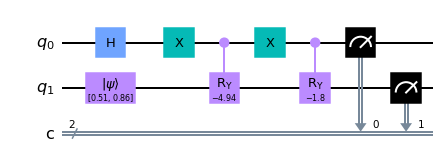

In [ ]:
qc.draw('mpl')

### Circuit Density Matrix 2x2

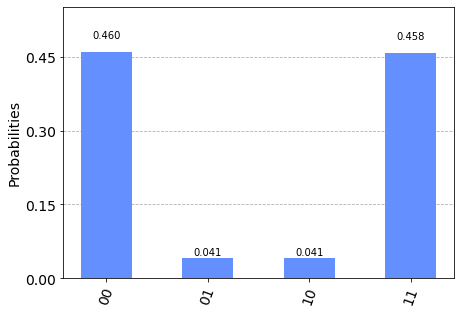

In [ ]:
# 2 x 2 Example with eigenvalues
backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(3, 2)

qc.h(0)
qc.initialize(c0, 1)
qc.initialize(np.sqrt(lambda_P), 2)
qc.barrier()
qc.x(0)
qc.cry(-(2*theta_0), 0,  1)
qc.x(0)
qc.cry(-(2*theta_1), 0,  1)
qc.cx(0, 2)
qc.barrier()
qc.measure(1, 0)
qc.measure(2, 1)

counts = execute(qc, backend, shots=150000).result().get_counts()
plot_histogram(counts)

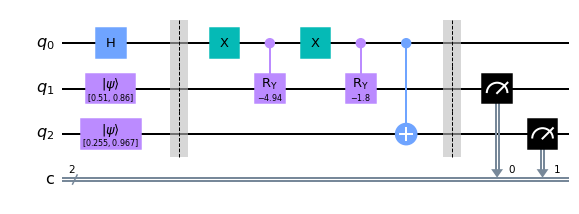

In [ ]:
qc.draw('mpl')

In [ ]:
# expected_value = (np.dot(vector_0, c0))**2 * lambda_P[0] + (np.dot(vector_1, c0))**2 * lambda_P[1]
expected_value = c0.T @ P0 @ c0

expected_value, (counts["00"]/150000)*2

(0.9186080711795597, 0.9202666666666667)

### Conclusion

The expected value of the density matrix was 0.9186, the quantum circuit obtained 0.9203

## Expected Value Density Matrix 4x4

In [ ]:
## Examples 4x4 , we build the density matrix with b, c, and predict the data a
a0 = np.array([0.30507657, 0.9523278250881023])
a1 = np.array([0.69810362, 0.715996742829809])
b0 = np.array([0.75399555, 0.6568795251643924])
b1 = np.array([0.53842219, 0.8426752312223279])
c0 = np.array([0.50986323, 0.8602554775727772])
c1 = np.array([0.58868076, 0.8083656120876385])

a = np.kron(a0, a1)
b = np.kron(b0, b1)
c = np.kron(c0, c1)

a, b, c

(array([0.21297506, 0.21843383, 0.6648235 , 0.68186362]),
 array([0.40596794, 0.63537337, 0.35367851, 0.55353611]),
 array([0.30014667, 0.4121559 , 0.50641585, 0.69540095]))

In [ ]:
# Density Matrix and expected value
P4 = 0.56*np.outer(b, b) + 0.44*np.outer(c, c)
exp_a = a.T @ P4 @ a

P4, exp_a

(array([[0.13193231, 0.19887826, 0.14728557, 0.21767983],
        [0.19887826, 0.30081552, 0.21767983, 0.32306316],
        [0.14728557, 0.21767983, 0.18289064, 0.26458465],
        [0.21767983, 0.32306316, 0.26458465, 0.38436153]]), 0.8026535900618249)

In [ ]:
# Find eigenvectors and eigenvalues
lambda_P4, U4 = np.linalg.eigh(P4)
lambda_P4 = round_lambda(lambda_P4)
lambda_P4, U4

(array([1.00000000e-08, 1.00000000e-08, 2.57332957e-02, 9.74266684e-01]),
 array([[-0.86865914, -0.10127904,  0.32009869, -0.36429477],
        [ 0.45816754,  0.17746336,  0.67972932, -0.54457076],
        [-0.08734651,  0.76104064, -0.48123093, -0.42615082],
        [ 0.16698618, -0.61568373, -0.45157688, -0.62380084]]))

### Circuit Density Matrix 4x4

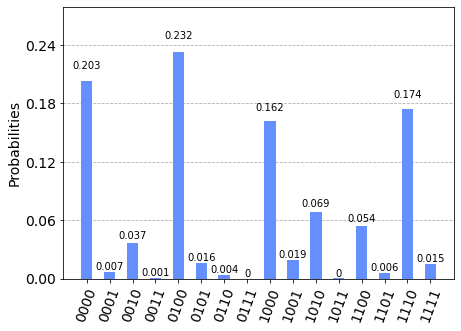

In [ ]:
# 4 x 4 Example with eigenvalues
backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(6, 4)

qc.h(0)
qc.h(1)
qc.append(ArbRot(*(a**2)), [2, 3])
qc.append(ArbRot(*lambda_P4), [4, 5])
qc.barrier()
qc.x(0)
qc.x(1)
qc.append(ArbRotToffTranspose(*(U4[:, 0]**2)), [0, 1, 2, 3])
qc.x(1)
qc.append(ArbRotToffTranspose(*(U4[:, 1]**2)), [0, 1, 2, 3])
qc.x(0)
qc.x(1)
qc.append(ArbRotToffTranspose(*(U4[:, 2]**2)), [0, 1, 2, 3])
qc.x(1)
qc.append(ArbRotToffTranspose(*(U4[:, 3]**2)), [0, 1, 2, 3])
qc.cx(1, 5)
qc.cx(0, 4)



qc.measure(2, 0)
qc.measure(3, 1)
qc.measure(4, 2)
qc.measure(5, 3)

counts = execute(qc, backend, shots=150000).result().get_counts()
plot_histogram(counts)

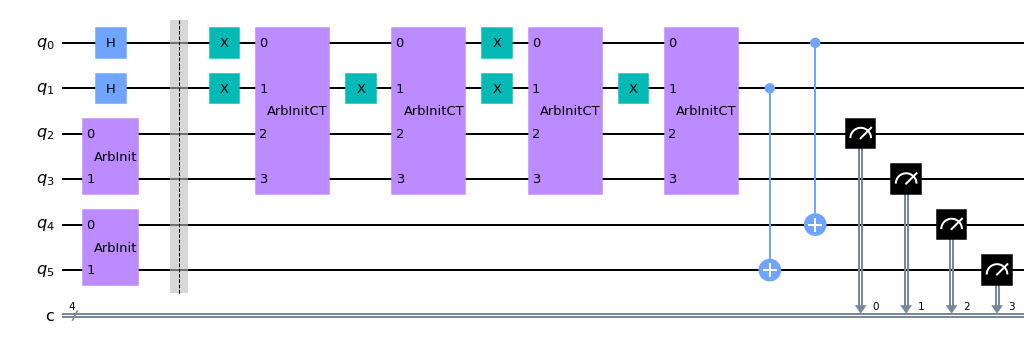

In [ ]:
qc.draw('mpl')

In [ ]:
exp_a_calculated = (counts["0000"]/150000)*4
exp_a_theorical = a.T @ P4 @ a

exp_a_calculated, exp_a_theorical

(0.8113333333333334, 0.8026535900618249)

### Conclusion

The expected value of the density matrix was 0.8026, the quantum circuit obtained 0.8113

## DMKDC Mixed State

In [ ]:
## Examples 4x4 , we build the density matrix of class 0 with b, c
## the density matrix of class 1 with d, and predict the data a
a0 = np.array([0.30507657, 0.9523278250881023])
a1 = np.array([0.69810362, 0.715996742829809])
b0 = np.array([0.75399555, 0.6568795251643924])
b1 = np.array([0.53842219, 0.8426752312223279])
c0 = np.array([0.50986323, 0.8602554775727772])
c1 = np.array([0.58868076, 0.8083656120876385])
d0 = np.array([0.10894686, 0.9940475751673762])
d1 = np.array([0.38544095, 0.9227325040677268])

a = np.kron(a0, a1)
b = np.kron(b0, b1)
c = np.kron(c0, c1)
d = np.kron(d0, d1)

a, b, c, d

(array([0.21297506, 0.21843383, 0.6648235 , 0.68186362]),
 array([0.40596794, 0.63537337, 0.35367851, 0.55353611]),
 array([0.30014667, 0.4121559 , 0.50641585, 0.69540095]),
 array([0.04199258, 0.10052881, 0.38314664, 0.91724001]))

In [ ]:
# Density Matrix and expected value
P0 = 0.66*np.outer(b, b) + 0.34*np.outer(c, c)
P1 = np.outer(d, d)
exp_a_P0 = a.T @ P0 @ a
exp_a_P1 = a.T @ P1 @ a

exp_a_P0, exp_a_P1

(0.7797639127048509, 0.8300298691432838)

In [ ]:
# Find eigenvectors and eigenvalues
lambda_P0_temp, U0 = np.linalg.eigh(P0)
lambda_P0 = round_lambda(lambda_P0_temp)

lambda_P1_temp, U1 = np.linalg.eigh(P1)
lambda_P1 = round_lambda(lambda_P1_temp)

(lambda_P0, U0), (lambda_P1, U1)

((array([1.00000000e-08, 1.00000000e-08, 2.33791892e-02, 9.76620791e-01]),
  array([[-0.87216761, -0.06441905,  0.30773227, -0.37479955],
         [ 0.4652687 ,  0.15791066,  0.66113058, -0.56700583],
         [-0.05505435,  0.76405582, -0.49521815, -0.40981302],
         [ 0.14077542, -0.62220022, -0.47219295, -0.60834446]])),
 (array([1.0000000e-08, 1.0000000e-08, 1.0000000e-08, 9.9999997e-01]),
  array([[ 9.83875698e-01, -1.39235844e-01,  1.04108665e-01,
           4.19925812e-02],
         [ 1.14990435e-01,  1.08386414e-01, -9.82305219e-01,
           1.00528809e-01],
         [-1.36987705e-01, -9.10200323e-01, -7.72553661e-02,
           3.83146642e-01],
         [-4.24046728e-04,  3.74701397e-01,  1.35164532e-01,
           9.17240008e-01]])))

### Circuit DMKDC

We add an additional qubit to encode the class

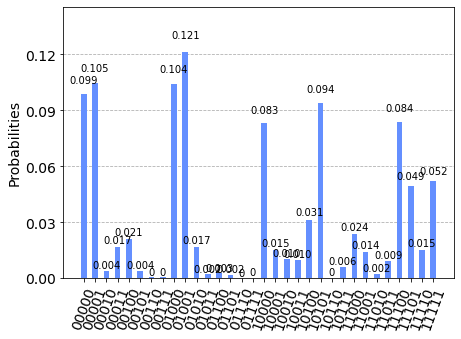

In [ ]:
# 4 x 4 Example with eigenvalues
backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(7, 5)

qc.h(0)
qc.h(1)
qc.h(2)
qc.append(ArbRot(*(a**2)), [3, 4])
qc.barrier()
qc.x(2)
qc.x(0)
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U0[:, 0]**2)), [0, 1, 2, 3, 4])
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U0[:, 1]**2)), [0, 1, 2, 3, 4])
qc.x(0)
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U0[:, 2]**2)), [0, 1, 2, 3, 4])
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U0[:, 3]**2)), [0, 1, 2, 3, 4])
qc.append(ArbRotControlled(*lambda_P0), [2, 5, 6])

qc.barrier()
qc.x(2)
qc.x(0)
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U1[:, 0]**2)), [0, 1, 2, 3, 4])
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U1[:, 1]**2)), [0, 1, 2, 3, 4])
qc.x(0)
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U1[:, 2]**2)), [0, 1, 2, 3, 4])
qc.x(1)
qc.append(ArbRotToffM2Transpose(*(U1[:, 3]**2)), [0, 1, 2, 3, 4])
qc.append(ArbRotControlled(*lambda_P1), [2, 5, 6])

qc.cx(1, 6)
qc.cx(0, 5)

qc.barrier()

qc.measure(2, 0)
qc.measure(3, 1)
qc.measure(4, 2)
qc.measure(5, 3)
qc.measure(6, 4)

counts = execute(qc, backend, shots=150000).result().get_counts()
plot_histogram(counts)

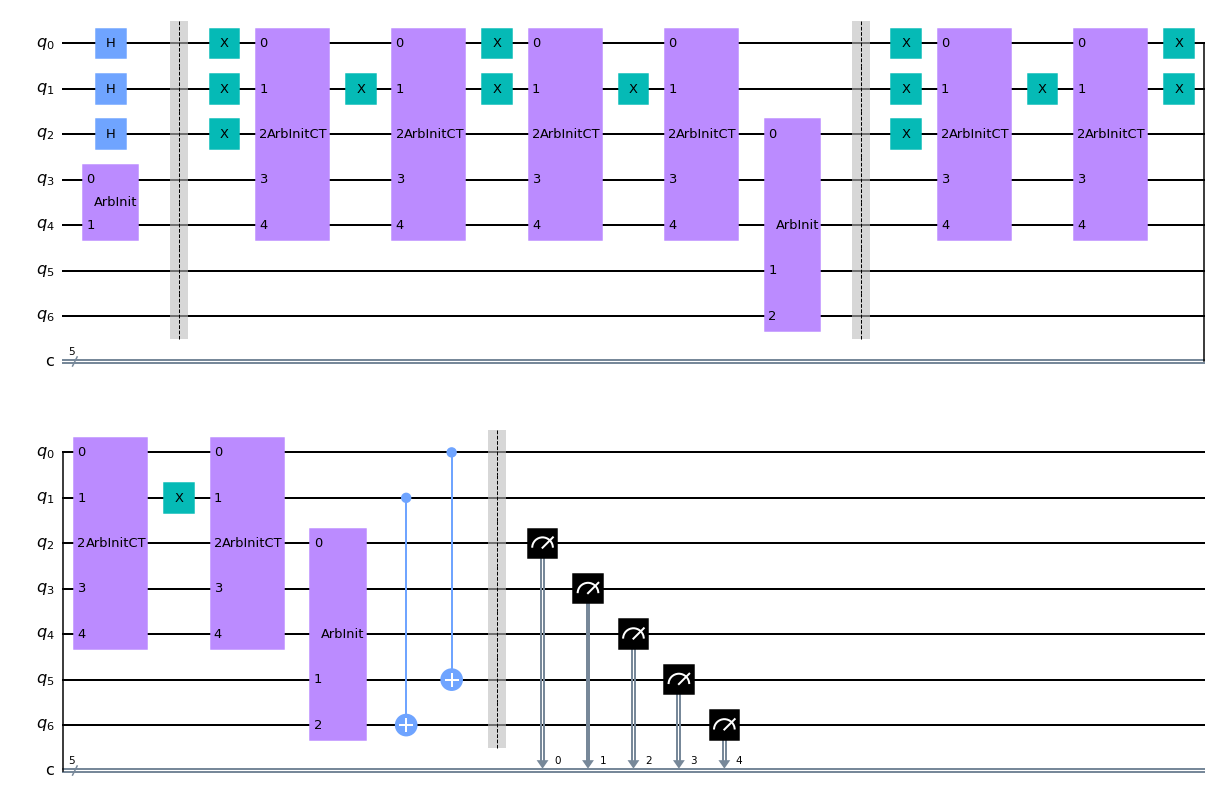

In [ ]:
qc.draw('mpl')

In [ ]:
# Expected and calculated for class 0
exp_a_calculated_P0 = (counts["00000"]/150000)*8
exp_a_theorical_P0 = a.T @ P0 @ a

# Expected and calculated for class 1
exp_a_calculated_P1 = (counts["00001"]/150000)*8
exp_a_theorical_P1 = a.T @ P1 @ a

exp_a_calculated_P0, exp_a_theorical_P0, exp_a_calculated_P1, exp_a_theorical_P1

(0.7897066666666667, 0.7797639127048509, 0.83856, 0.8300298691432838)

### Conclusion


Class 0: The expected value of the density matrix was 0.7798, the quantum circuit obtained 0.7897

Class 0: The expected value of the density matrix was 0.7798, the quantum circuit obtained 0.7897

## Digits Dataset

We will work with the Digits dataset, available from Scikit-Learn. We will build a binary classifier, so we will use only the data for digits 0 and 1. The revisted dataset consiste of 360 images: each image consist of 64 pixels, and all images are labeled, so we will do supervised learning for this dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
digits, labels = datasets.load_digits(n_class=2, return_X_y=True)
print(digits.shape)

(360, 64)


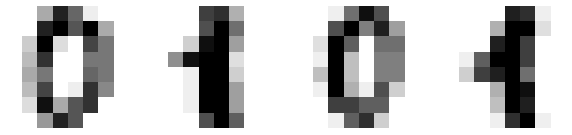

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits, labels):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

We will apply dimensionality reduction on the entire data set. For this we will use the PCA method found in Scikit-Learn. We will build a graph in which the variance generated by the first principal components is shown.

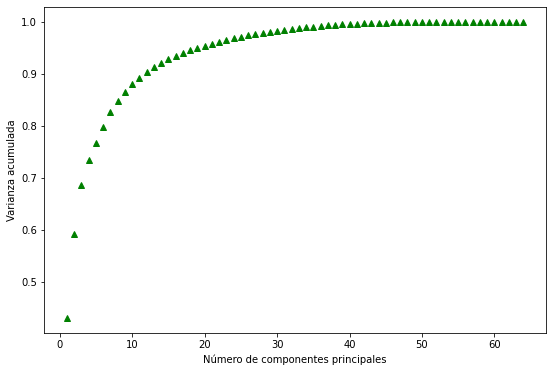

In [ ]:
sklearn_pca = PCA(n_components=64)
sklearn_transf = sklearn_pca.fit_transform(digits)
varianza_expl = sklearn_pca.explained_variance_ratio_

plt.figure(figsize = (9, 6))
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')

cum_var_exp = np.cumsum(varianza_expl)
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')

plt.show()

In [ ]:
print(np.sum(varianza_expl[0:4]), np.sum(varianza_expl[0:8]),
      np.sum(varianza_expl[0:16]), np.sum(varianza_expl[0:32])) 

0.7343821751814189 0.8488897097986975 0.9349381446651397 0.9865762881675042


We choose to use only four principal components, that concentrate 73.44% of the variance of the data. Transforming each image into an array of four values will allow us to convert those values into two-qubit states in a later step.

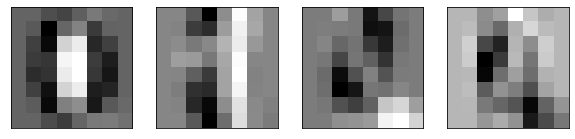

In [ ]:
n_comps = 4
pca = PCA(n_components = n_comps)
Xpca = pca.fit_transform(digits)

plt.figure(figsize=(10,2.5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(pca.components_[i].reshape(8,8), cmap=plt.cm.gray)
    plt.xticks([]); plt.yticks([])


In [ ]:
Xpca.shape

(360, 4)

Once our images have been reduced to arrays, it's important to normalize those arrays. Also we will split the dataset into two groups, the images labeled '0' and the images labeled '1'. This will be useful in the construction of training states.

In [ ]:
V0 = []
V1 = []

for i in range(Xpca.shape[0]):
    if (labels[i] == 0):
        V0.append(Xpca[i] / np.linalg.norm(Xpca[i]))
    elif (labels[i] == 1):
        V1.append(Xpca[i] / np.linalg.norm(Xpca[i]))

print(V0[0:9])
print(V1[0:9])

[array([-0.96461175, -0.03469186,  0.02259613,  0.26040364]), array([-0.90565791, -0.06052352, -0.41329874, -0.07283407]), array([-0.86043944,  0.0880531 , -0.44601489, -0.23013331]), array([-0.9961216 , -0.00346231, -0.05449524, -0.068993  ]), array([-0.84453737, -0.20119917, -0.40344103, -0.28898246]), array([-0.92439828, -0.37854895, -0.02073807, -0.04193372]), array([-0.95429831, -0.25833599,  0.13884569,  0.0574381 ]), array([-0.6378455 ,  0.01511889, -0.6831358 , -0.35531677]), array([-0.79328908, -0.02515803, -0.3341317 , -0.50834586])]
[array([ 0.99668899, -0.01930275, -0.0461384 ,  0.06410702]), array([ 0.66602183,  0.73851471, -0.07803519, -0.07015306]), array([ 0.61395619,  0.78489308, -0.04819382, -0.06839597]), array([0.68803293, 0.71120081, 0.00579495, 0.14411978]), array([0.68804686, 0.68053337, 0.04259847, 0.24829663]), array([ 0.61999146,  0.78166862, -0.0609321 ,  0.02986712]), array([0.7928533 , 0.57639774, 0.0728766 , 0.1839519 ]), array([ 0.71780492,  0.68154201, -

In [ ]:
print(len(V0))
print(len(V1))

178
182


In [ ]:
print((V1[3]**2).round(4))

[0.4734 0.5058 0.     0.0208]


## Classification

In this section, we will focus in the construction of the classifier and the quantum circuits required. Those circuits will be based in a custom gate called ArbRot designed to build an arbitrary two-state vector given the probabilities for each basis state ($|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$). This gate consists on three gates, two RX and a CRX.

To build up our circuits, we will define, based on this first gate, controlled, double-controlled and triple-controlled versions.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [ ]:
def ArbRot(p0, p1, p2, p3):
    qr = QuantumRegister(2)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.rx(ang0, qr[1])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.rx(ang1, qr[0])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.crx(ang2, qr[1], qr[0])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbRot"
    return gate

In [ ]:
def ArbRotControlled(p0, p1, p2, p3):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.crx(ang0, qr[0],  qr[2])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.crx(ang1, qr[0], qr[1])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(ang2, [qr[0], qr[2]], qr[1])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbRot-C"
    return gate

In [ ]:
def ArbRotControlledTranspose(p0, p1, p2, p3):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.crx(-ang0, qr[0],  qr[2])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.crx(-ang1, qr[0], qr[1])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[2]], qr[1])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbRot-C-dg"
    return gate

In [ ]:
def ArbRotToffTranspose(p0, p1, p2, p3):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.mcrx(-ang0, [qr[0], qr[1]],  qr[3])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.mcrx(-ang1, [qr[0], qr[1]], qr[2])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[1], qr[3]], qr[2])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbRot-2C-dg"
    return gate

In [ ]:
def ArbRotToffM2Transpose(p0, p1, p2, p3):
    qr = QuantumRegister(5)
    qc = QuantumCircuit(qr)

    ang0 = 2*np.arccos(np.sqrt(p0+p1))
    qc.mcrx(-ang0, [qr[0], qr[1], qr[2]],  qr[4])
    ang1 = 2*np.arccos(np.sqrt(p0/(p0+p1)))
    qc.mcrx(-ang1, [qr[0], qr[1], qr[2]], qr[3])
    ang2 = 2*np.arccos(np.sqrt(p2/(p2+p3))) - ang1
    qc.mcrx(-ang2, [qr[0], qr[1], qr[2], qr[4]], qr[3])
    #qc.swap(qr[0], qr[1])

    gate = qc.to_gate()
    gate.label = "ArbRot-3C-dg"
    return gate

To transform a four-values array into a two-qubit state, we will do the following transformation:

$$
(a,b,c,d) \rightarrow a|00\rangle + b|01\rangle + c|10\rangle + d|11\rangle
$$

This makes sense because we have normalized our arrays before, that is, $a^2+b^2+c^2+d^2=1$ for each array. In our quantum circuits, the task of building each particular state will be performed by our ArbRot gates.

### One sample per class

To perform a classification, we need to define three states: 


* $|\psi_0 \rangle$, the state that holds all the information from '0' samples in the training process.
* $|\psi_1 \rangle$, the state that holds all the information from '1' samples in the training process.
* $|x \rangle$, the state corresponding to the image we want to classify.

As a first approximation, we will choose one array from the '0' partition as $|\psi_0 \rangle$, and one array from the '1' partition as $|\psi_1 \rangle$. Next, we will try to predict labels for other two arrays, each one from a different partition.



In [ ]:
import numpy as np

a0 = np.array(V0[1])
a1 = np.array(V1[1])
b = np.array(V0[2])
c = np.array(V1[2])

In [ ]:
0.5*np.dot(a0, b)**2, 0.5*(np.dot(a0, c)**2)

(0.475345104071906, 0.16741141389309663)

In [ ]:
0.5*np.dot(a1, b)**2, 0.5*(np.dot(a1, c)**2)

(0.10446724853375967, 0.49712645102867914)

In our most basic proposed circuit, we will have three qubits. The least significant ($q_0$) will act as an ancillary qubit, and the other two qubits ($q_1$ and $q_2$) will store our states. So we prepare our state $|x \rangle$ using an ArbRot; we then put an ArbRotControlled, using the ancilla qubit as control, that performs rotations given by the state $|\psi_0 \rangle$; and then we put another ArbRotControlled that performs rotations given by the state $|\psi_1 \rangle$. Finally we measure the qubits, and we expect that, when the state of the two most significant qubits is $|00 \rangle$, the ancilla qubit will store the prediction, either $|0 \rangle$ for label '0' or $|1 \rangle$ for label '1'.

To obtain a more solid prediction, we will run the circuit many shots, and then we will compare the amount of $|000 \rangle$ versus the amount of $|001 \rangle$. If $|000 \rangle$ is more common, the prediction will be '0'; otherwise, the prediction will be '1'.

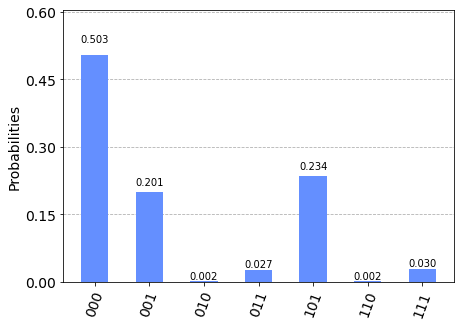

In [ ]:
# Zero sample

qc = QuantumCircuit(3, 3)

qc.h(0)
qc.append(ArbRot(*(a0**2)), [2,1])

qc.barrier()

qc.x(0)
qc.append(ArbRotControlledTranspose(*(b**2)), [0,2,1])

qc.barrier()

qc.x(0)
qc.append(ArbRotControlledTranspose(*(c**2)), [0,2,1])

qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

shots = 10000
job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
print((int)(counts['000'] < counts['001']))

0


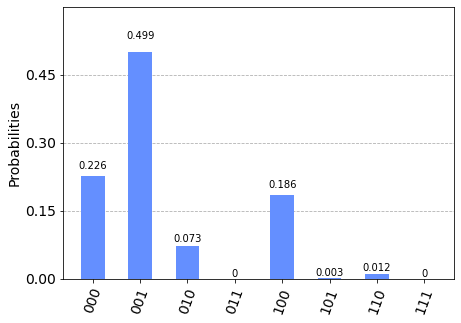

In [ ]:
# One sample

qc = QuantumCircuit(3, 3)

qc.h(0)
qc.append(ArbRot(*(a1**2)), [2,1])

qc.barrier()

qc.x(0)
qc.append(ArbRotControlledTranspose(*(b**2)), [0,2,1])

qc.barrier()

qc.x(0)
qc.append(ArbRotControlledTranspose(*(c**2)), [0,2,1])

qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

shots = 10000
job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
print((int)(counts['000'] < counts['001']))

1


As we observe, both samples were correctly classified.

The following images show the circuit used in the examples above, the first indicating the ArbRot gates applied, and the second showing the required amounts of rotations, controlled rotations and CNOTs.

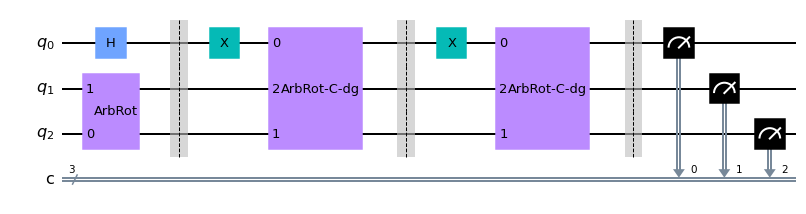

In [ ]:
qc.draw('mpl')

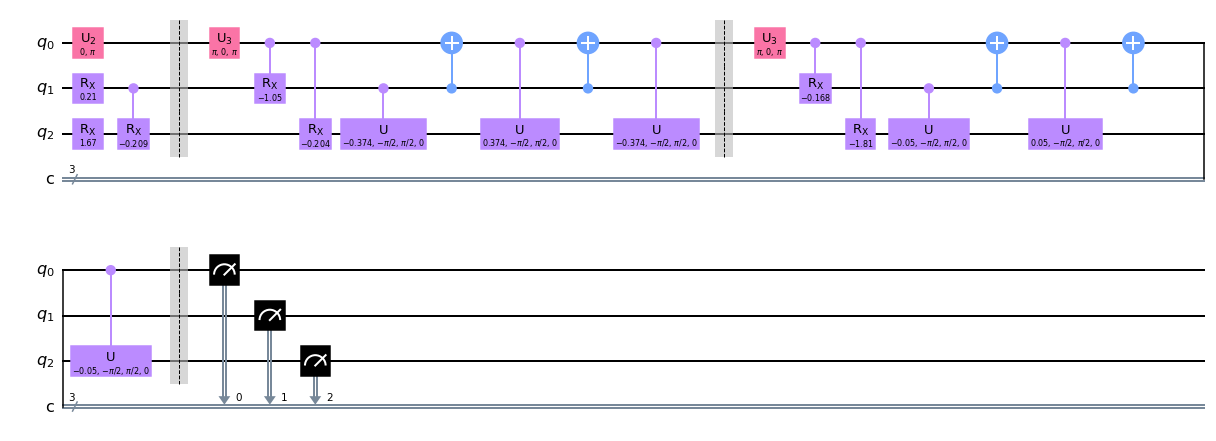

In [ ]:
qc.decompose().draw('mpl')

### Pure State Classifier

Now, we will define properly the states $|\psi_0 \rangle$ and  $|\psi_1 \rangle$. This can be done in many ways, so here we will use the Pure State approach. This indicates that

$$
 |\psi_0 \rangle = \frac {\sum |\phi_0 \rangle} {\left \| \sum |\phi_0 \rangle \right \|}
$$

being $|\phi_0 \rangle$ the states labeled with '0'. 

Similarly, we define

$$
 |\psi_1 \rangle = \frac {\sum |\phi_1 \rangle} {\left \| \sum |\phi_1 \rangle \right \|}
$$

being $|\phi_1 \rangle$ the states labeled with '1'. To construct these states, only train samples will be used.


In [ ]:
#Pure state for class 0
S_zero = np.sum(np.abs(V0[0:121]), axis=0)
#S_zero = np.sum(V0[0:121], axis=0)
S_zero = S_zero / np.linalg.norm(S_zero)
print(S_zero)

[0.94247141 0.12817377 0.20752908 0.22858438]


In [ ]:
#Pure state for class 1
S_one = np.sum(np.abs(V1[0:121]), axis=0)
#S_one = np.sum(V1[0:121], axis=0)
S_one = S_one / np.linalg.norm(S_one)
print(S_one)

[0.7522197  0.49571815 0.38369994 0.20298621]


Now, we will run the same circuit used before. We need a different circuit for each sample  $|x \rangle$ in the test, and each circuit will run many times to build a more accurate prediction.

In [ ]:
# Pure state case
test_zeros = []

for i in range(121, 178):
    qc = QuantumCircuit(3, 3)

    qc.h(0)
    qc.append(ArbRot(*(np.array(V0[i])**2)), [2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_zero**2)), [0,2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_one**2)), [0,2,1])

    qc.barrier()

    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    shots = 12000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    counts = job.result().get_counts()
    test_zeros.append((int)(counts['000'] < counts['001']))

print(test_zeros)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
# Pure state case
test_ones = []

for i in range(121, 182):
    qc = QuantumCircuit(3, 3)

    qc.h(0)
    qc.append(ArbRot(*(np.array(V1[i])**2)), [2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_zero**2)), [0,2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_one**2)), [0,2,1])

    qc.barrier()

    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    shots = 12000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    counts = job.result().get_counts()
    test_ones.append((int)(counts['000'] < counts['001']))

print(test_ones)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


**Classifier Reports**

Once we have a prediction for all the test samples, we will report the confusion matrix and some metrics (accuracy, precision, recall, F1 score).

In [ ]:
ytest = np.concatenate([np.zeros(len(test_zeros)), np.ones(len(test_ones))])

preds = np.concatenate([test_zeros, test_ones])

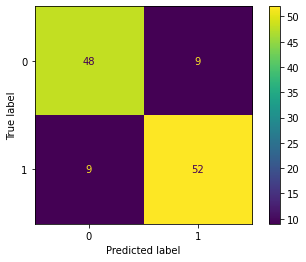

In [ ]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(ytest, preds)

cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [ ]:
accuracy = metrics.accuracy_score(ytest,preds)
print("Accuracy: ", accuracy)
precision, recall, f_score, _ = metrics.precision_recall_fscore_support(ytest, preds, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f_score)

Accuracy:  0.847457627118644
Precision:  0.8524590163934426
Recall:  0.8524590163934426
F1:  0.8524590163934426


### Mixed State Classifier


Now, we will redefine the training states using another approach: Mixed State. We will not work directly with $|\psi_0 \rangle$ and $|\psi_1 \rangle$; instead we will use their corresponding density matrices, $\rho_0$ and $\rho_1$. So we have

$$
\rho_0 = \frac{1}{n} \sum |\phi_0 \rangle \langle \phi_0 |
$$

being $|\phi_0 \rangle$ the states labeled with '0', and $n$ the amount of '0' samples. 

Similarly, we define

$$
\rho_1 = \frac{1}{m} \sum |\phi_1 \rangle \langle \phi_1 |
$$

being $|\phi_1 \rangle$ the states labeled with '1', and $m$ the amount of '1' samples. To construct the density matrices, only train samples will be used.

Once we built $\rho_0$ and $\rho_1$, we apply the second circuit proposed. In this circuit, we require three ancillary qubits, two qubits to store states, and two auxiliary qubits. We will use ArbRot to define the state $|x \rangle$ we want to classify, and then we'll apply four ArbRot with three controls and one ArbRot with one control to perform the rotations indicated by $\rho_0$; after that, we'll apply other four ArbRot with three controls and one ArbRot with one control to perform the rotations indicated by $\rho_1$. Finally we'll measure the qubits, and the most significant ancilla qubit ($q_2$) will determine the prediction when the state of the other measured qubits is $|0000 \rangle$.

To obtain a more solid prediction, we will run the circuit many shots, and then we will compare the amount of $|00000 \rangle$ versus the amount of $|00001 \rangle$. If $|00000 \rangle$ is more common, the prediction will be '0'; otherwise, the prediction will be '1'.

Now, we are ready to use this new circuit for our dataset. So we will build the density matrices $\rho_0$ and $\rho_1$ using the train samples for the respective labels. Also we need to perform eigen-decompositions of the two matrices. 

In [ ]:
Z_zero = np.outer(np.abs(V0[0]), np.abs(V0[0]))
for i in range(1, 121):
    Z_zero += np.outer(np.abs(V0[i]), np.abs(V0[i]))

Z_zero *= 1/120
print(Z_zero)

[[0.84098733 0.11112925 0.16993777 0.18888191]
 [0.11112925 0.02429141 0.02373526 0.02690334]
 [0.16993777 0.02373526 0.0673663  0.05376573]
 [0.18888191 0.02690334 0.05376573 0.07568829]]


In [ ]:
lambda_P0_temp, U_zero = np.linalg.eigh(Z_zero)
lambda_zero = round_lambda(lambda_P0_temp)
print(lambda_zero)
print(U_zero)

[0.00932379 0.01756579 0.04447589 0.92863453]
[[-0.11660424 -0.02199912 -0.30481398 -0.94499097]
 [ 0.99051938  0.05144787  0.01083254 -0.12691389]
 [ 0.00354016 -0.70871728  0.67595449 -0.20197232]
 [-0.07254158  0.7032702   0.6708626  -0.22381269]]


In [ ]:
Z_one = np.outer(np.abs(V1[0]), np.abs(V1[0]))
for i in range(1, 121):
    Z_one += np.outer(np.abs(V1[i]), np.abs(V1[i]))

Z_one *= 1/120
print(Z_one)

[[0.48870747 0.27367608 0.20872624 0.12179777]
 [0.27367608 0.27199215 0.10905759 0.06913222]
 [0.20872624 0.10905759 0.19846444 0.06883592]
 [0.12179777 0.06913222 0.06883592 0.04916928]]


In [ ]:
lambda_P1_temp, U_one = np.linalg.eigh(Z_one)
lambda_one = round_lambda(lambda_P1_temp)
print(lambda_one)
print(U_one)

[0.01531458 0.0678419  0.12256667 0.79427685]
[[-0.17464078  0.62668804  0.04404586 -0.7581706 ]
 [-0.00648166 -0.55262727 -0.67100606 -0.49427923]
 [-0.16212154 -0.54914909  0.72947362 -0.37419263]
 [ 0.97117207  0.01733416  0.12521607 -0.20210212]]


Like before, we need a different circuit for each sample $|x \rangle$ in the test, and each circuit will run many times to build a more accurate prediction.

In [ ]:
backend2 = Aer.get_backend('qasm_simulator')

In [ ]:
# Mixed state case
test2_zeros = []

for i in range(121, 178):

    qc = QuantumCircuit(7, 5)

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.append(ArbRot(*(V0[i]**2)), [3, 4])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_zero), [2, 5, 6])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_one), [2, 5, 6])
    qc.cx(1, 6)
    qc.cx(0, 5)

    qc.barrier()

    qc.measure(2, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    qc.measure(5, 3)
    qc.measure(6, 4)

    counts = execute(qc, backend2, shots=50000).result().get_counts()
    test2_zeros.append((int)(counts['00000'] < counts['00001']))

print(test2_zeros)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
# Mixed state case
test2_ones = []

for i in range(121, 182):

    qc = QuantumCircuit(7, 5)

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.append(ArbRot(*(V1[i]**2)), [3, 4])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_zero), [2, 5, 6])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_one), [2, 5, 6])
    qc.cx(1, 6)
    qc.cx(0, 5)

    qc.barrier()

    qc.measure(2, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    qc.measure(5, 3)
    qc.measure(6, 4)

    counts = execute(qc, backend2, shots=50000).result().get_counts()
    test2_ones.append((int)(counts['00000'] < counts['00001']))

print(test2_ones)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


**Classifier Reports**

Once we have a prediction for all the test samples, we will report the confusion matrix and some metrics (accuracy, precision, recall, F1 score).

In [ ]:
ytest = np.concatenate([np.zeros(len(test2_zeros)), np.ones(len(test2_ones))])

preds2 = np.concatenate([test2_zeros, test2_ones])

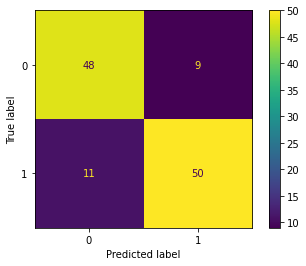

In [ ]:
import sklearn.metrics as metrics

cm2 = metrics.confusion_matrix(ytest, preds2)

cm2_display = metrics.ConfusionMatrixDisplay(cm2, display_labels=[0,1]).plot()

In [ ]:
accuracy = metrics.accuracy_score(ytest,preds2)
print("Accuracy: ", accuracy)
precision, recall, f_score, _ = metrics.precision_recall_fscore_support(ytest, preds2, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f_score)

Accuracy:  0.8305084745762712
Precision:  0.847457627118644
Recall:  0.819672131147541
F1:  0.8333333333333333


### Classifying with noisy backends

In [ ]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

In [ ]:
from qiskit.test.mock import FakeCasablanca
from qiskit.providers.aer import AerSimulator

device_backend = FakeCasablanca()
casablanca = AerSimulator.from_backend(device_backend)

In [ ]:
# Pure state case
test_zeros = []

for i in range(121, 178):
    qc = QuantumCircuit(3, 3)

    qc.h(0)
    qc.append(ArbRot(*(np.array(V0[i])**2)), [2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_zero**2)), [0,2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_one**2)), [0,2,1])

    qc.barrier()

    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    shots = 12000
    job = execute(qc, backend=casablanca, shots=shots)
    counts = job.result().get_counts()
    test_zeros.append((int)(counts['000'] < counts['001']))

print(test_zeros)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
# Pure state case
test_ones = []

for i in range(121, 182):
    qc = QuantumCircuit(3, 3)

    qc.h(0)
    qc.append(ArbRot(*(np.array(V1[i])**2)), [2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_zero**2)), [0,2,1])

    qc.barrier()

    qc.x(0)
    qc.append(ArbRotControlledTranspose(*(S_one**2)), [0,2,1])

    qc.barrier()

    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    shots = 12000
    job = execute(qc, backend=casablanca, shots=shots)
    counts = job.result().get_counts()
    test_ones.append((int)(counts['000'] < counts['001']))

print(test_ones)

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


**Classifier Reports**

Once we have a prediction for all the test samples, we will report the confusion matrix and some metrics (accuracy, precision, recall, F1 score).

In [ ]:
ytest = np.concatenate([np.zeros(len(test_zeros)), np.ones(len(test_ones))])

preds = np.concatenate([test_zeros, test_ones])

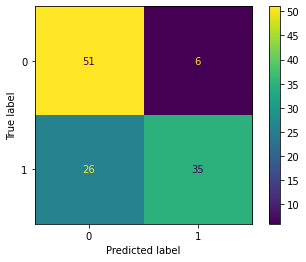

In [ ]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(ytest, preds)

cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [ ]:
accuracy = metrics.accuracy_score(ytest,preds)
print("Accuracy: ", accuracy)
precision, recall, f_score, _ = metrics.precision_recall_fscore_support(ytest, preds, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f_score)

Accuracy:  0.7288135593220338
Precision:  0.8536585365853658
Recall:  0.5737704918032787
F1:  0.6862745098039217


In [ ]:
# Mixed state case
test2_zeros = []

for i in range(121, 178):

    qc = QuantumCircuit(7, 5)

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.append(ArbRot(*(V0[i]**2)), [3, 4])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_zero), [2, 5, 6])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_one), [2, 5, 6])
    qc.cx(1, 6)
    qc.cx(0, 5)

    qc.barrier()

    qc.measure(2, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    qc.measure(5, 3)
    qc.measure(6, 4)

    counts = execute(qc, backend=casablanca, shots=50000).result().get_counts()
    test2_zeros.append((int)(counts['00000'] < counts['00001']))

print(test2_zeros)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
# Mixed state case
test2_ones = []

for i in range(121, 182):

    qc = QuantumCircuit(7, 5)

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.append(ArbRot(*(V1[i]**2)), [3, 4])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_zero[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_zero), [2, 5, 6])

    qc.barrier()
    qc.x(2)
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 0]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 1]**2)), [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 2]**2)), [0, 1, 2, 3, 4])
    qc.x(1)
    qc.append(ArbRotToffM2Transpose(*(U_one[:, 3]**2)), [0, 1, 2, 3, 4])
    qc.append(ArbRotControlled(*lambda_one), [2, 5, 6])
    qc.cx(1, 6)
    qc.cx(0, 5)

    qc.barrier()

    qc.measure(2, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    qc.measure(5, 3)
    qc.measure(6, 4)

    counts = execute(qc, backend=casablanca, shots=50000).result().get_counts()
    test2_ones.append((int)(counts['00000'] < counts['00001']))

print(test2_ones)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


**Classifier Reports**

Once we have a prediction for all the test samples, we will report the confusion matrix and some metrics (accuracy, precision, recall, F1 score).

In [ ]:
ytest = np.concatenate([np.zeros(len(test2_zeros)), np.ones(len(test2_ones))])

preds2 = np.concatenate([test2_zeros, test2_ones])

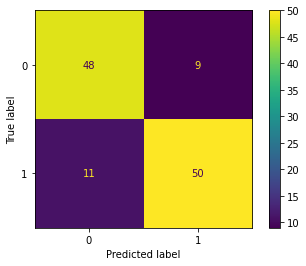

In [ ]:
import sklearn.metrics as metrics

cm2 = metrics.confusion_matrix(ytest, preds2)

cm2_display = metrics.ConfusionMatrixDisplay(cm2, display_labels=[0,1]).plot()

In [ ]:
accuracy = metrics.accuracy_score(ytest,preds2)
print("Accuracy: ", accuracy)
precision, recall, f_score, _ = metrics.precision_recall_fscore_support(ytest, preds2, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f_score)

Accuracy:  0.8305084745762712
Precision:  0.847457627118644
Recall:  0.819672131147541
F1:  0.8333333333333333


## Acknowledgements

The team thanks specially to our mentor Fabio González for his valuable help and support, and to Vladimir Vargas-Calderón for the useful discussions we had during the completion of this project. Also, we acknowledge the use of IBM Quantum services.

## References

[González2021] Fabio  A.  González,  Alejandro  Gallego,  Santiago  Toledo-Cortés,  and Vladimir Vargas-Calderón.  Learning with Density Matrices and Random Features.  2021.  URL http://arxiv.org/abs/2102.04394.

[QTML2021] Vladimir Vargas-Calderón, Fabio A. González, Herbert Vinck-Posada. Optimisation-Free Classification with Quantum Circuit Measurements. 2021.

[Useche2021] Diego H Useche, Andres Giraldo-Carvajal, Hernan M Zuluaga-Bucheli, Jose A Jaramillo-Villegas, and Fabio A González. Quantum measurement classification with qudits. arXiv preprint arXiv:2107.09781, 2021.